In [6]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import gdown

# Modeli yükləyin
gdown.download('https://drive.google.com/uc?id=1vOQ5umopx0lN_IEEUeO-Mg2qgi33Xt38', 'model_VGG16.keras', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1vOQ5umopx0lN_IEEUeO-Mg2qgi33Xt38
From (redirected): https://drive.google.com/uc?id=1vOQ5umopx0lN_IEEUeO-Mg2qgi33Xt38&confirm=t&uuid=8247c309-a313-4717-8b4c-d54500f55d39
To: /content/model_VGG16.keras
100%|██████████| 179M/179M [00:00<00:00, 204MB/s]


'model_VGG16.keras'

Lütfən aşağıdakı siniflərdən birinə uyğun şəkil yükləyin:
['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


Saving frog.jpg to frog.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The estimated class of the uploaded photo: Frog


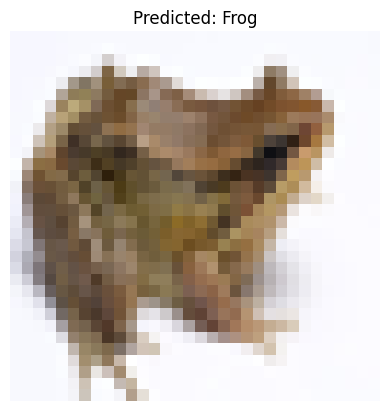

In [7]:


# Mövcud siniflər
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# İstifadəçidən sinif seçimi istəyirik
print("Lütfən aşağıdakı siniflərdən birinə uyğun şəkil yükləyin:")
print(class_labels)

uploaded = files.upload()

# Modeli yükləyin
model = tf.keras.models.load_model('model_VGG16.keras')

# Şəkili hazırlamaq funksiyası
def prepare_image(image, target_size):
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image, image_array  # Hem orijinal şəkili, hem də array qaytarır


# Fayl yüklənir
image_path = next(iter(uploaded))
image = Image.open(image_path)
target_size = (32, 32)

# Şəkili hazırlayın
original_image, image_array = prepare_image(image, target_size)

# Modeli test edin
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)

# Nəticəni çap edin
print(f'The estimated class of the uploaded photo: {class_labels[predicted_class[0]]}')

# Şəkili göstərin
plt.imshow(original_image)
plt.title(f'Predicted: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()
